<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week10/Session_10_CIFAR_gradcam_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!cp -rp '/content/drive/My Drive/py_files/models' .
!cp -rp '/content/drive/My Drive/py_files/utils' .

In [0]:
!pip install pytorch-gradcam
!pip install torch-lr-finder -v --global-option="amp"

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-goqgywny
Created temporary directory: /tmp/pip-req-tracker-vp24vxhs
Created requirements tracker '/tmp/pip-req-tracker-vp24vxhs'
Created temporary directory: /tmp/pip-install-u8wbkb0a
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-vp24vxhs'


In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test
from utils.disp_summary import disp_summary
from utils.gradcam import grad_cam
from models.resnet import ResNet18
from utils.lr_finder import LRFinder

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [0]:
!pip install albumentations
trainset, testset, train_loader, test_loader, classes =download_load()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


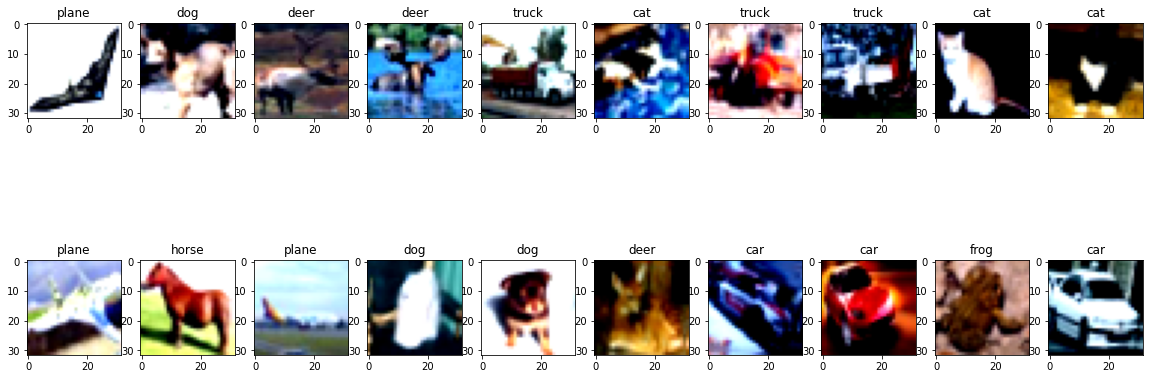

In [0]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=ResNet18().to(device)

In [0]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
         Dropout2d-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
         Dropout2d-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         Dropout2d-9           [-1, 64, 32, 32]               0
       BasicBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
        Dropout2d-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


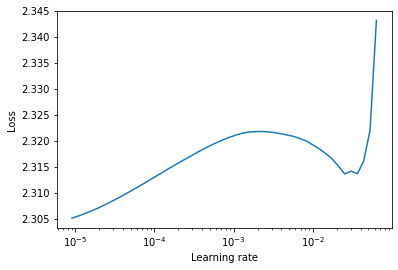

In [0]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet18().to(device)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, val_loader=test_loader, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [0]:
lr_finder.reset()

In [0]:
lr_finder.range_test(trainloader, val_loader=testloader, end_lr=100, num_iter=100, step_mode="exp")

In [0]:
lr_finder.plot(skip_end=0)

In [0]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = OneCycleLR(optimizer,max_lr=0.5,total_steps=30)

for epoch in range(1, 31):
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.020000000000000018]


/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.468903660774231 Batch_id=781 Accuracy=29.76: 100%|██████████| 782/782 [01:03<00:00, 12.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5406, Accuracy: 4345/10000 (43.45%)

Epoch: 2 Learning_Rate [0.03826891219729123]


Loss=1.711622714996338 Batch_id=781 Accuracy=43.26: 100%|██████████| 782/782 [01:03<00:00, 12.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3038, Accuracy: 5205/10000 (52.05%)

Epoch: 3 Learning_Rate [0.09029437251522865]


Loss=1.5158271789550781 Batch_id=781 Accuracy=50.03: 100%|██████████| 782/782 [01:04<00:00, 12.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1628, Accuracy: 5760/10000 (57.60%)

Epoch: 4 Learning_Rate [0.16815597623237843]


Loss=0.968757152557373 Batch_id=781 Accuracy=57.93: 100%|██████████| 782/782 [01:03<00:00, 12.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9149, Accuracy: 6763/10000 (67.63%)

Epoch: 5 Learning_Rate [0.26]


Loss=1.7343107461929321 Batch_id=781 Accuracy=64.47: 100%|██████████| 782/782 [01:02<00:00, 12.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8444, Accuracy: 7052/10000 (70.52%)

Epoch: 6 Learning_Rate [0.3518440237676215]


Loss=1.392416000366211 Batch_id=781 Accuracy=69.50: 100%|██████████| 782/782 [01:02<00:00, 12.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7356, Accuracy: 7468/10000 (74.68%)

Epoch: 7 Learning_Rate [0.42970562748477137]


Loss=0.8001425266265869 Batch_id=781 Accuracy=72.73: 100%|██████████| 782/782 [01:03<00:00, 12.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7169, Accuracy: 7643/10000 (76.43%)

Epoch: 8 Learning_Rate [0.4817310878027088]


Loss=1.21555757522583 Batch_id=781 Accuracy=75.65: 100%|██████████| 782/782 [01:03<00:00, 12.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6783, Accuracy: 7735/10000 (77.35%)

Epoch: 9 Learning_Rate [0.5]


Loss=0.5915207862854004 Batch_id=781 Accuracy=77.50: 100%|██████████| 782/782 [01:03<00:00, 12.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6448, Accuracy: 7888/10000 (78.88%)

Epoch: 10 Learning_Rate [0.49720771772545586]


Loss=0.5116305351257324 Batch_id=781 Accuracy=79.45: 100%|██████████| 782/782 [01:03<00:00, 12.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5583, Accuracy: 8137/10000 (81.37%)

Epoch: 11 Learning_Rate [0.4888932458737294]


Loss=0.5035296678543091 Batch_id=781 Accuracy=80.66: 100%|██████████| 782/782 [01:03<00:00, 12.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5517, Accuracy: 8194/10000 (81.94%)

Epoch: 12 Learning_Rate [0.47524231600673683]


Loss=0.7066896557807922 Batch_id=781 Accuracy=82.08: 100%|██████████| 782/782 [01:03<00:00, 12.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4813, Accuracy: 8427/10000 (84.27%)

Epoch: 13 Learning_Rate [0.4565598673402244]


Loss=0.46224096417427063 Batch_id=781 Accuracy=83.25: 100%|██████████| 782/782 [01:03<00:00, 12.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4800, Accuracy: 8365/10000 (83.65%)

Epoch: 14 Learning_Rate [0.4332632349055847]


Loss=0.21871690452098846 Batch_id=781 Accuracy=84.37: 100%|██████████| 782/782 [01:03<00:00, 12.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4701, Accuracy: 8473/10000 (84.73%)

Epoch: 15 Learning_Rate [0.40587282697488153]


Loss=0.40914657711982727 Batch_id=781 Accuracy=85.13: 100%|██████████| 782/782 [01:02<00:00, 12.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4545, Accuracy: 8484/10000 (84.84%)

Epoch: 16 Learning_Rate [0.3750005]


Loss=0.5157987475395203 Batch_id=781 Accuracy=86.01: 100%|██████████| 782/782 [01:03<00:00, 12.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4605, Accuracy: 8549/10000 (85.49%)

Epoch: 17 Learning_Rate [0.34133589075057447]


Loss=0.4465891122817993 Batch_id=781 Accuracy=87.31: 100%|██████████| 782/782 [01:03<00:00, 12.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4649, Accuracy: 8512/10000 (85.12%)

Epoch: 18 Learning_Rate [0.30563101096814466]


Loss=0.4422779083251953 Batch_id=781 Accuracy=87.92: 100%|██████████| 782/782 [01:04<00:00, 12.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4786, Accuracy: 8559/10000 (85.59%)

Epoch: 19 Learning_Rate [0.2686834486665125]


Loss=0.38006678223609924 Batch_id=781 Accuracy=88.93: 100%|██████████| 782/782 [01:03<00:00, 12.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4351, Accuracy: 8607/10000 (86.07%)

Epoch: 20 Learning_Rate [0.23131855133348753]


Loss=0.38895776867866516 Batch_id=781 Accuracy=89.58: 100%|██████████| 782/782 [01:03<00:00, 12.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4192, Accuracy: 8689/10000 (86.89%)

Epoch: 21 Learning_Rate [0.19437098903185537]


Loss=0.241130992770195 Batch_id=781 Accuracy=90.49: 100%|██████████| 782/782 [01:03<00:00, 12.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4092, Accuracy: 8753/10000 (87.53%)

Epoch: 22 Learning_Rate [0.15866610924942562]


Loss=0.6862382888793945 Batch_id=781 Accuracy=91.60: 100%|██████████| 782/782 [01:03<00:00, 12.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4329, Accuracy: 8722/10000 (87.22%)

Epoch: 23 Learning_Rate [0.12500150000000004]


Loss=0.2863506078720093 Batch_id=781 Accuracy=92.43: 100%|██████████| 782/782 [01:03<00:00, 12.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4268, Accuracy: 8795/10000 (87.95%)

Epoch: 24 Learning_Rate [0.09412917302511849]


Loss=0.6437771916389465 Batch_id=781 Accuracy=92.97: 100%|██████████| 782/782 [01:03<00:00, 12.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4223, Accuracy: 8788/10000 (87.88%)

Epoch: 25 Learning_Rate [0.0667387650944153]


Loss=0.5755559206008911 Batch_id=781 Accuracy=93.94: 100%|██████████| 782/782 [01:03<00:00, 12.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4319, Accuracy: 8818/10000 (88.18%)

Epoch: 26 Learning_Rate [0.043442132659775645]


Loss=0.005234241485595703 Batch_id=781 Accuracy=94.78: 100%|██████████| 782/782 [01:03<00:00, 12.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4225, Accuracy: 8834/10000 (88.34%)

Epoch: 27 Learning_Rate [0.024759683993263143]


Loss=0.2262805700302124 Batch_id=781 Accuracy=95.27: 100%|██████████| 782/782 [01:03<00:00, 12.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4283, Accuracy: 8847/10000 (88.47%)

Epoch: 28 Learning_Rate [0.01110875412627059]


Loss=0.16774652898311615 Batch_id=781 Accuracy=95.65: 100%|██████████| 782/782 [01:03<00:00, 12.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4132, Accuracy: 8872/10000 (88.72%)

Epoch: 29 Learning_Rate [0.002794282274544094]


Loss=0.01668885350227356 Batch_id=781 Accuracy=95.94: 100%|██████████| 782/782 [01:03<00:00, 12.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4210, Accuracy: 8873/10000 (88.73%)

Epoch: 30 Learning_Rate [2e-06]


Loss=0.2433532476425171 Batch_id=781 Accuracy=96.08: 100%|██████████| 782/782 [01:03<00:00, 12.28it/s]



Test set: Average loss: 0.4239, Accuracy: 8875/10000 (88.75%)



In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
PATH = '/content/gdrive/My Drive/Colab Notebooks/eva4_s9/assignment9_ResNet18V2_model.h5'
!touch PATH
torch.save(model.state_dict(), PATH)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
device= 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet18().to(device)
PATH = '/content/gdrive/My Drive/Colab Notebooks/eva4_s9/assignment9_ResNet18V2_model.h5'
model.load_state_dict(torch.load(PATH))

Mounted at /content/gdrive


<All keys matched successfully>

/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


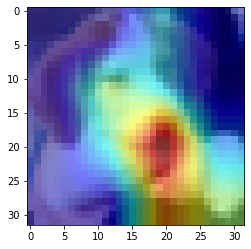

In [0]:

from utils.gradcam import grad_cam
img=testset.data[16]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)
